<a href="https://colab.research.google.com/github/gabrielreversi/AnalisesExploratorias/blob/main/DSNP_3_0_Analisando_os_Dados_do_Airbnb_(Toronto%2C_Canada).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### **Estudo de Caso 1 - Análise Exploratória - Sigmoidal**
*by [Gabriel Reversi](https://www.linkedin.com/in/gabriel-carvalho-130b15138/)*

---

# Análise dos Dados do Airbnb - *Toronto, Canada*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

<right><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>



# Toronto, Ontario - Canada

Toronto, a capital da província de Ontário, é uma grande cidade canadense localizada ao longo da costa noroeste do Lago Ontário. Ela é uma metrópole dinâmica com um centro de arranha-céus imponentes, todos ofuscados pela famosa Torre CN. Toronto também tem muitos espaços verdes, incluindo desde o oval Queen’s Park até o High Park, com 400 acres de área, além de trilhas, instalações esportivas e um jardim zoológico.

Neste notebook vamos analisar os dados do Airbnb desta cidade e ver quais insights podemos identificar!!

<img width="800" src="https://cursosnocanada.com.br/files/2018/03/Toronto.jpg">






## Obtenção dos Dados

Os dados foram obtidos do site [InsideAirbnb](http://insideairbnb.com/get-the-data.html)

Para essa análise foi usado o seguinte arquivo:
[listings](http://data.insideairbnb.com/canada/on/toronto/2021-11-06/visualisations/listings.csv)
Summary information and metrics for listings in Toronto (good for visualisations).


In [34]:
# importar os pacotes necessarios

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [35]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2021-11-06/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada 
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - o grupo de bairro foi geocodificado usando a latitude e longitude
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias
* number_of_reviews_ltm - Número de reviews da lista nos últimos 12 meses
* license - Número de licença


In [36]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64590,-79.42423,Entire home/apt,469,28,7,2017-12-04,0.09,1,0,0,NaN
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64080,-79.37673,Private room,93,180,169,2013-08-27,1.51,2,365,0,NaN
2,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69805,-79.45411,Private room,72,28,217,2018-10-10,1.74,2,365,0,NaN
3,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,South Riverdale,43.66884,-79.32725,Entire home/apt,45,365,26,2011-06-25,0.21,1,251,0,NaN
4,30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64015,-79.37625,Entire home/apt,125,180,1,2010-08-11,0.01,2,365,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Para iniciar nossa análise vamos começar identificando a quantidade de entradas e variaveis que esse conjunto de dados possui.
Lembrando que o conjunto que estamos usando é a versão resumida do Airbnb.

In [37]:
# identificar o volume de dados do DataFrame
print("Entradas: \t {}".format(df.shape[0]))
print("Variaveis: \t {}\n".format(df.shape[1]))

# tipo de dados de cada coluna
print(df.dtypes)

Entradas: 	 15155
Variaveis: 	 18

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Identificar os valores nulos dos campos que possuimos é uma parte importante na análise exploratória. Aqui conseguimos avaliar se a base é consistente ou não.
Abaixo está o percentual da valores nulos em cada colunba. Podemos identificar que a coluna ***neighbourhood_group*** não possui valor nenhum, está 100% zerada. Seguindo das colunas ***license***, ***reviews_per month*** e ***last_review***

In [38]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

neighbourhood_group               100.000000
license                            68.056747
reviews_per_month                  22.909931
last_review                        22.909931
host_name                           0.079182
name                                0.006598
longitude                           0.000000
host_id                             0.000000
neighbourhood                       0.000000
latitude                            0.000000
room_type                           0.000000
number_of_reviews_ltm               0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Ao visualizar a distribuição dos valores de cada métrica, conseguimos identificar alguns outliers em métricas importantes como ***price*** e ***minimum_nights***. Já que vamos usar essas métricas para tirar insights no decorrer deste notebook, abaixo iremos tratar a coluna ***price***.

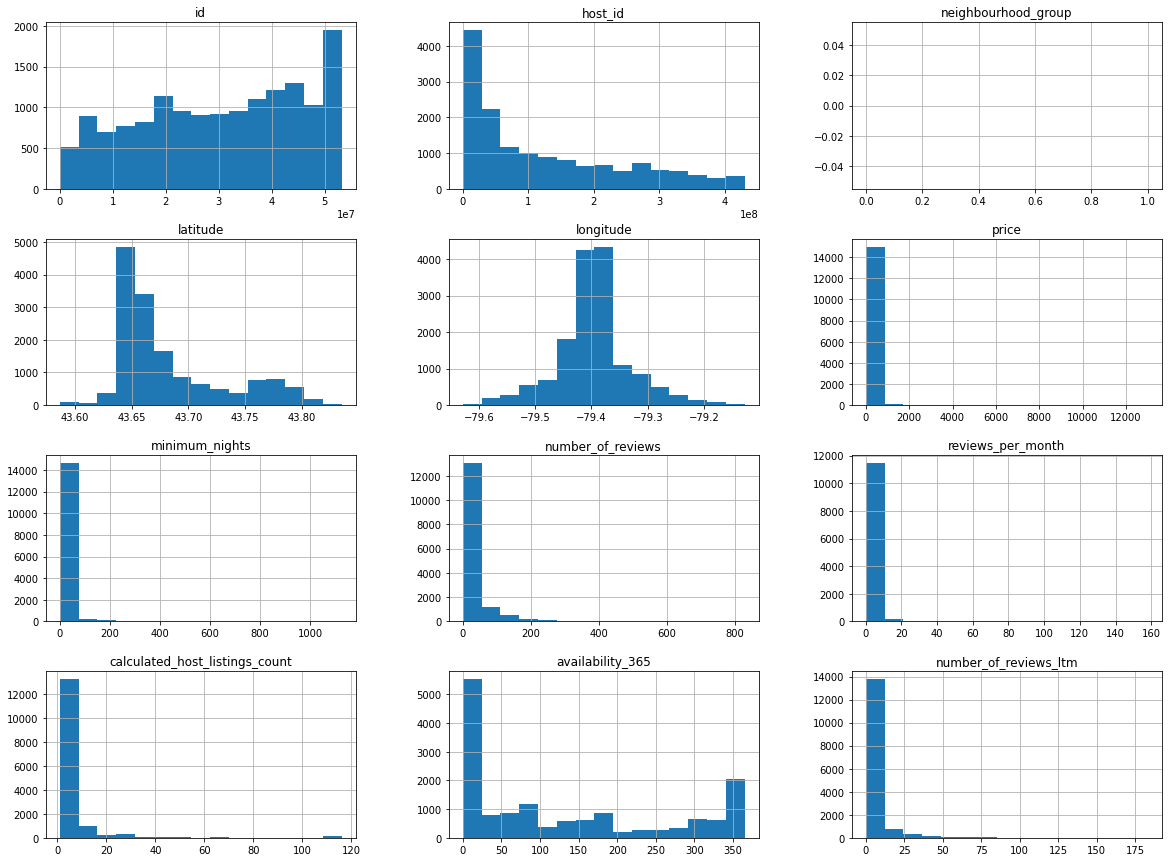

In [39]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,15));

###**Removendo Outliers da Coluna 'Price'**
Na tabela abaixo podemos ver que a coluna 'price' possui uma média de 154,90 e um valor maximo de 13000 e 75% está entre 165,00. Com isso iremos remover os registros acima de 500.

In [40]:
# normalizando a coluna 'price'
df_clean = df.copy()
df_clean.price.describe()

count    15155.000000
mean       154.902474
std        363.241210
min          0.000000
25%         67.000000
50%        100.000000
75%        165.000000
max      13000.000000
Name: price, dtype: float64

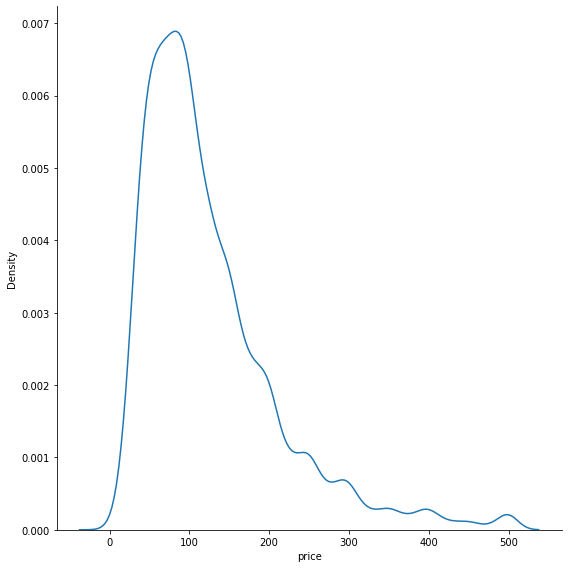

In [41]:
# Removendo valores acima de 500
df_clean.drop(df_clean[df_clean.price >500].index, axis=0, inplace=True)
sns.displot(df_clean.price,  kind='kde', height=8, aspect=1);

### **Q4. Qual a média dos preços de aluguel?**

Após a remoção dos outliers, conseguimos extrair a média de valor com mais precisão.
O valor médio dos alugueis da cidade de Toronto é de $ 125,33

In [42]:
# ver a média da coluna `price``
print(df_clean.price.describe())
print("\nMédia de Preço: {}".format(df_clean.price.mean()))

count    14804.000000
mean       125.337071
std         85.426934
min          0.000000
25%         65.000000
50%        100.000000
75%        158.000000
max        500.000000
Name: price, dtype: float64

Média de Preço: 125.33707106187516


### **Q4. Qual a correlação existente entre as variáveis**

In [43]:
# criar uma matriz de correlação
corr_var = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr_var)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.048226,0.007096,0.050903,0.034666,0.050970
minimum_nights,-0.048226,1.000000,-0.081406,-0.121918,-0.021116,0.053368
number_of_reviews,0.007096,-0.081406,1.000000,0.295443,-0.068856,0.008469
reviews_per_month,0.050903,-0.121918,0.295443,1.000000,-0.020482,0.024232
calculated_host_listings_count,0.034666,-0.021116,-0.068856,-0.020482,1.000000,0.149353
availability_365,0.050970,0.053368,0.008469,0.024232,0.149353,1.000000


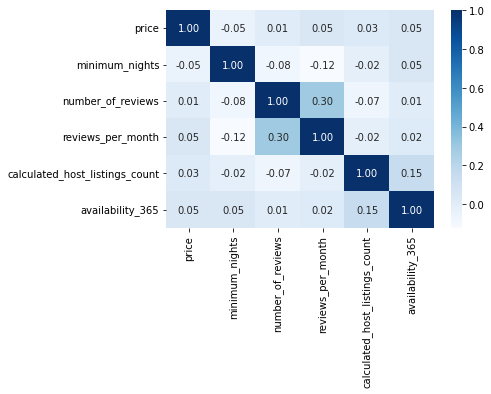

In [44]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr_var, cmap='Blues', fmt='.2f',annot=True, linecolor='white', square=False);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

O tipo de imovel mais alugado na cidade de Toronto são as casas e apartamentos (Entire home/apt) que corresponde a 65% dos imoveis alugados, seguido dos quartos individuais (Private room), que representa 33%,  e quartos compartilhados (shared room) representando 1,28%.

In [45]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    9617
Private room       4963
Shared room         192
Hotel room           32
Name: room_type, dtype: int64

In [46]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.shape[0]*100

Entire home/apt    64.962172
Private room       33.524723
Shared room         1.296947
Hotel room          0.216158
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**
Um dos bairros mais caros da cidade de Toronto é o Bridle Path-Sunnybrook-York Mills. Um bairro nobre da cidade, repleto e mansões e parques com acesso a rodovias principais e centros comerciais.

Seguidos dos bairros:

2º Lawrence Park South  

3º Leaside-Bennington



In [47]:
# ver preços por bairros, na média
df_clean.groupby(df_clean.neighbourhood).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Bridle Path-Sunnybrook-York Mills    214.666667
Waterfront Communities-The Island    175.613116
Beechborough-Greenbrook              165.500000
Niagara                              158.048986
Casa Loma                            157.446429
The Beaches                          154.000000
Bay Street Corridor                  153.567929
Rosedale-Moore Park                  152.030303
Lawrence Park South                  148.073171
Princess-Rosethorn                   147.142857
Name: price, dtype: float64

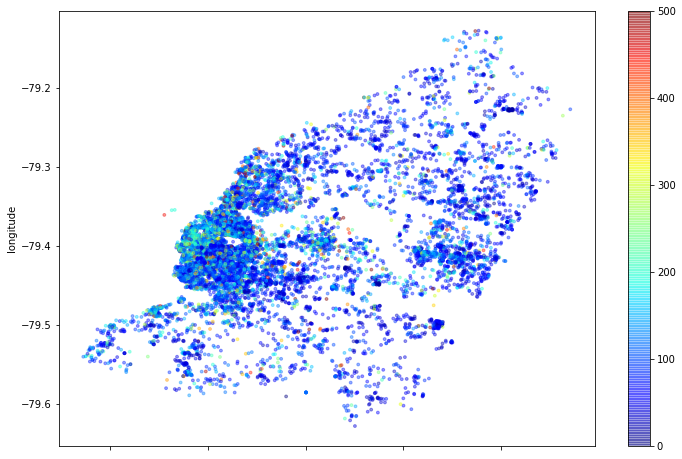

In [48]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='latitude', y='longitude', figsize=(12,8), c=df_clean['price'], alpha=0.4, s=8, cmap=plt.get_cmap('jet'))

Esse Scatterplot foi criado, baseado na variáveis de latitute/longitude e também na variável price, a idéia foi identificar os pontos mais caros e mais baratos da cidade de Toronto.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [49]:
# ver a média da coluna `minimum_nights``
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.minimum_nights.mean()

20.91748847108904

## Conclusões


Apesar de ter usarmos a versão resumida do dataset do Airbnb, foi possível extrair alguns insights.
Está base mais resumida  é uma ótima opção para uma análise mais basica dos dados.

Apesar de ser resumida, tivemos fazer alguns tratamentos para conseguir extrair conhecimento com mais precisão.

Resumo:
* Há presença de imóveis por toda a cidade com uma distribuição bem homogênea
* A variável preço apresenta outliers na maxima dos preços
* A presença desses outliers influencia a média de estadia por localidade
* A média de estadia por noites é: 20 noites